# Exploratory data analysis on NETFLIX using python**

In [67]:
import numpy as np # linear algebra
import pandas as pd # for data preparation
import matplotlib.pyplot as plt # for data visualization(Graphical repr.)
import seaborn as sns # for data visualization(Graphical repr.)
import plotly.express as px # for data visualization
from textblob import TextBlob # for sentiment analysis
data=pd.read_csv('netflix_titles.csv')
data.shape

(8807, 12)

In [46]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [47]:
data.columns #Shows columns available in our dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [63]:
# finding total number of null values
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [48]:
data.describe()  #describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [49]:
data.info() #Pandas dataframe.info() function is used to get a concise summary of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [50]:
data.head() #Top 5 rows of dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Distribution of Content:**
To begin the task of analyzing Netflix data, we’ll start by looking at the distribution of content ratings on Netflix:

In [51]:

x = data.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(x, values='counts', names='rating',
 title='Distribution of Content Ratings on Netflix:')
pieChart.show()


In [52]:
x

,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


**Top 5 Actors and Directors:**

Now let’s see the top 5 successful directors on this platform:

In [53]:
data['director']=data['director'].fillna('No Director Specified') #Pandas Series.fillna() function is used to fill NA/NaN values using the specified method.
f_dir=pd.DataFrame()
f_dir=data['director'].str.split(',',expand=True).stack()
f_dir=f_dir.to_frame()
f_dir.columns=['Director']
d=f_dir.groupby(['Director']).size().reset_index(name='Total Content')
d=d[d.Director !='No Director Specified']
d=d.sort_values(by=['Total Content'],ascending=False)
d_Top5=d.head()
d_Top5=d_Top5.sort_values(by=['Total Content'])
fig=px.bar(d_Top5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig.show()


**The top 5 Successful Actors**

In [54]:
data['cast']=data['cast'].fillna('No Cast Specified')
f_c=pd.DataFrame()
f_c=data['cast'].str.split(',',expand=True).stack()
f_c=f_c.to_frame()
f_c.columns=['Actor']
actr=f_c.groupby(['Actor']).size().reset_index(name='Total Content')
actr=actr[actr.Actor !='No Cast Specified']
actr=actr.sort_values(by=['Total Content'],ascending=False)
actr_Top5=actr.head()
actr_Top5=actr_Top5.sort_values(by=['Total Content'])
actr_Top5

,Actor,Total Content
23624,Om Puri,27
15541,Julie Tejwani,28
30303,Takahiro Sakurai,30
26941,Rupa Bhimani,31
2612,Anupam Kher,39


**Analyzing Content on Netflix:**
The next thing to analyze from this data is the trend of production over the years on Netflix:

In [56]:
df1=data[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
df2

,Release Year,type,Total Content
95,2010,Movie,154
96,2010,TV Show,40
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173
100,2012,TV Show,64
101,2013,Movie,225
102,2013,TV Show,63
103,2014,Movie,264
104,2014,TV Show,88


/home/hrx/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of Country')

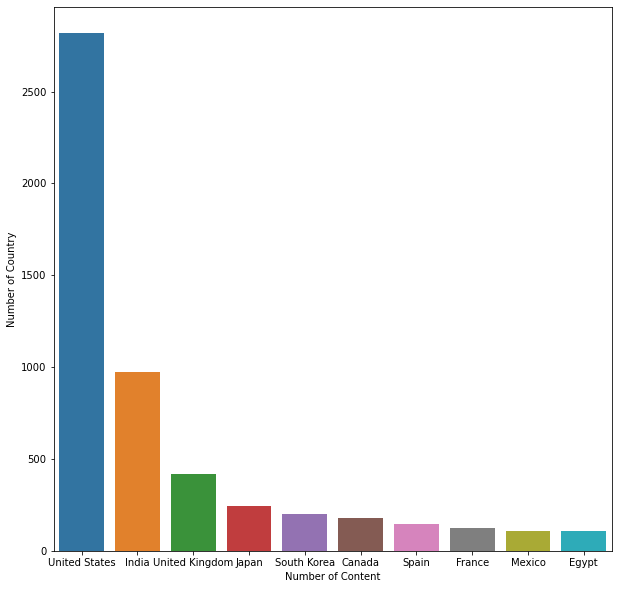

In [82]:
# showing TOP 10 country wise content
fig=data.country.value_counts().head(10) #for top 10
plt.figure(figsize=(10,10))
ax=sns.barplot(fig.index,fig.values) #(fig.values,fig.index) -------> For Vertical Plotting :)
ax.set_xlabel("Number of Content")
ax.set_ylabel("Number of Country")

# Can't Understand the Error, so not able to resolve :) _Hrishabh

<AxesSubplot:xlabel='Rating', ylabel='Count'>

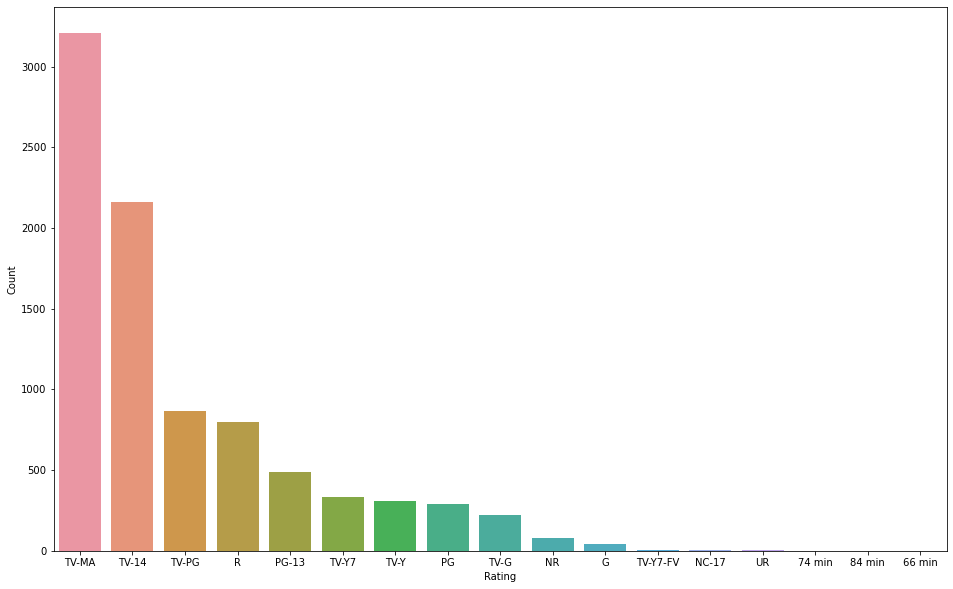

In [73]:
# Showing  no. of contents in different ratings 
x=df.rating.value_counts()
plt.figure(figsize=(16,10))
plt.xlabel("Rating")
plt.ylabel("Count")
sns.barplot(x=x.index ,y= x.values)

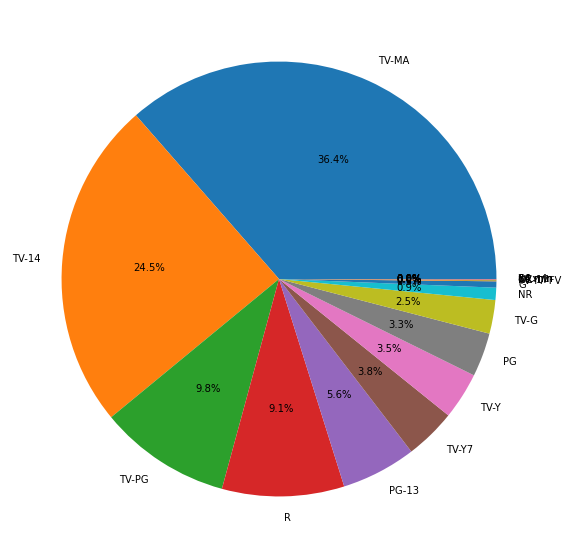

In [74]:
# Pie chart of the same above data 
plt.figure(figsize=(10,10))
plt.pie(x.values,labels=x.index,autopct="%1.1f%%")
plt.show()

In [21]:
df1=data[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

**Sentiment Analysis**:

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or
neutral.

The sentiment function of textblob returns two properties, polarity, and subjectivity.
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which
lies in the range of [0,1].

In [80]:
d_f=data[['release_year','description']]
d_f=d_f.rename(columns={'release_year':'Release Year'})
for index,row in d_f.iterrows():
 z=row['description']
 testimonial=TextBlob(z)
 p=testimonial.sentiment.polarity
 if p==0:
    sent='Neutral'
 elif p>0:
    sent='Positive'
 else:
    sent='Negative'
 d_f.loc[[index,2],'Sentiment']=sent
d_f=d_f.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')
d_f=d_f[d_f['Release Year']>=2010]
fig4 = px.bar(d_f, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

## There are many other operations available in the Data_Science to perform on the Dataset. But this is the End of this Data Analysis. 

# Thanks _-_-_-_-_-_-_-_-_-_-_--_Hrishabh :)